In [1]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline   
import seaborn as sns
from pandas.plotting import register_matplotlib_converters
import random as random
import os

from matplotlib.colors import ListedColormap
from matplotlib.colors import LinearSegmentedColormap

sns.set_theme()
sns.set_context("notebook")
%load_ext autoreload
%autoreload 2

In [2]:
milk_data = pd.read_csv('../Data/CowData/RawGIGACOW/MilkYield.csv',delimiter=';', index_col=0)
milk_data.head()

/var/folders/n0/fphw_xw93vv749r_ntt01qd80000gn/T/ipykernel_2230/286119663.py:1: DtypeWarning: Columns (6) have mixed types. Specify dtype option on import or set low_memory=False.
  milk_data = pd.read_csv('../Data/CowData/RawGIGACOW/MilkYield.csv',delimiter=';', index_col=0)


,Del_Cow_Id,FarmName_Pseudo,SE_Number,AnimalNumber,StartDate,StartTime,LactationNumber,DaysInMilk,LactationInfoSource,SessionNumber,TotalYield,OriginalFileSource,dwh_factCowMilk_Id,dwh_factCowMilkOther_Id
1,3300,a624fb9a,SE-a624fb9a-1210,1210,2019-11-27,00:04:00,NaN,NaN,Unknown,1.0,"8,53",a624fb9a\GIGACOW_milking_v1_20191127.txt,1.0,NaN
2,3674,a624fb9a,SE-a624fb9a-1273,1273,2019-11-27,00:36:00,NaN,NaN,Unknown,1.0,"11,16",a624fb9a\GIGACOW_milking_v1_20191127.txt,2.0,NaN
3,992,a624fb9a,SE-a624fb9a-1058,1058,2019-11-27,01:14:00,7.0,60.0,Estimate,1.0,"8,33",a624fb9a\GIGACOW_milking_v1_20191127.txt,3.0,NaN
4,3194,a624fb9a,SE-a624fb9a-1223,1223,2019-11-27,01:49:00,NaN,NaN,Unknown,1.0,"13,47",a624fb9a\GIGACOW_milking_v1_20191127.txt,4.0,NaN
5,5348,a624fb9a,SE-a624fb9a-1238,1238,2019-11-27,02:05:00,NaN,NaN,Unknown,1.0,"14,26",a624fb9a\GIGACOW_milking_v1_20191127.txt,5.0,NaN


In [3]:
# Count duplicates
duplicates = milk_data.duplicated()
print(duplicates.sum())

# Remove duplicates from milk data
milk_data = milk_data.drop_duplicates()
milk_data.head()

0


,Del_Cow_Id,FarmName_Pseudo,SE_Number,AnimalNumber,StartDate,StartTime,LactationNumber,DaysInMilk,LactationInfoSource,SessionNumber,TotalYield,OriginalFileSource,dwh_factCowMilk_Id,dwh_factCowMilkOther_Id
1,3300,a624fb9a,SE-a624fb9a-1210,1210,2019-11-27,00:04:00,NaN,NaN,Unknown,1.0,"8,53",a624fb9a\GIGACOW_milking_v1_20191127.txt,1.0,NaN
2,3674,a624fb9a,SE-a624fb9a-1273,1273,2019-11-27,00:36:00,NaN,NaN,Unknown,1.0,"11,16",a624fb9a\GIGACOW_milking_v1_20191127.txt,2.0,NaN
3,992,a624fb9a,SE-a624fb9a-1058,1058,2019-11-27,01:14:00,7.0,60.0,Estimate,1.0,"8,33",a624fb9a\GIGACOW_milking_v1_20191127.txt,3.0,NaN
4,3194,a624fb9a,SE-a624fb9a-1223,1223,2019-11-27,01:49:00,NaN,NaN,Unknown,1.0,"13,47",a624fb9a\GIGACOW_milking_v1_20191127.txt,4.0,NaN
5,5348,a624fb9a,SE-a624fb9a-1238,1238,2019-11-27,02:05:00,NaN,NaN,Unknown,1.0,"14,26",a624fb9a\GIGACOW_milking_v1_20191127.txt,5.0,NaN


In [4]:
# Delete columns that are not needed
milk_data = milk_data.drop(columns=['Del_Cow_Id', 'LactationInfoSource', 'OriginalFileSource', 'dwh_factCowMilk_Id', 'dwh_factCowMilkOther_Id'])

In [5]:
milk_data['StartTime'] = pd.to_datetime(milk_data['StartTime'], format='%H:%M:%S', errors='coerce').dt.time
milk_data['StartDate'] = pd.to_datetime(milk_data['StartDate'], errors='coerce')
# Convert TotalYield to string if necessary, then remove commas and convert to numeric
if milk_data['TotalYield'].dtype != 'object':
    milk_data['TotalYield'] = milk_data['TotalYield'].astype(str)
milk_data['TotalYield'] = pd.to_numeric(milk_data['TotalYield'].str.replace(',', '.'), errors='coerce')
milk_data.head()

,FarmName_Pseudo,SE_Number,AnimalNumber,StartDate,StartTime,LactationNumber,DaysInMilk,SessionNumber,TotalYield
1,a624fb9a,SE-a624fb9a-1210,1210,2019-11-27,00:04:00,NaN,NaN,1.0,8.53
2,a624fb9a,SE-a624fb9a-1273,1273,2019-11-27,00:36:00,NaN,NaN,1.0,11.16
3,a624fb9a,SE-a624fb9a-1058,1058,2019-11-27,01:14:00,7.0,60.0,1.0,8.33
4,a624fb9a,SE-a624fb9a-1223,1223,2019-11-27,01:49:00,NaN,NaN,1.0,13.47
5,a624fb9a,SE-a624fb9a-1238,1238,2019-11-27,02:05:00,NaN,NaN,1.0,14.26


No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


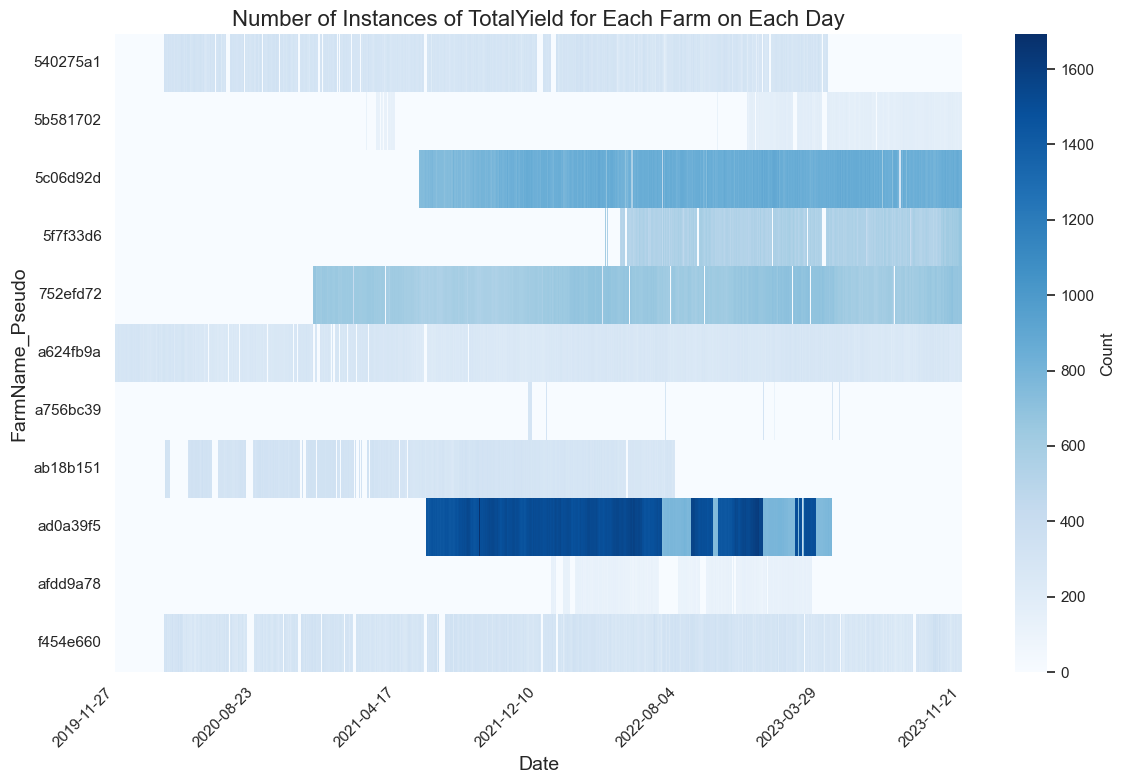

In [6]:
# Group the data by 'FarmName_Pseudo' and 'StartDate', and get the count of 'TotalYield'
count_data = milk_data.groupby(['FarmName_Pseudo', 'StartDate'])['TotalYield'].count().reset_index(name='Count')

# Convert 'StartDate' to datetime
count_data['StartDate'] = pd.to_datetime(count_data['StartDate'])

# Sort the data by date to ensure the labels match the ticks
count_data.sort_values('StartDate', inplace=True)

# Pivot to have 'StartDate' as columns and 'FarmName_Pseudo' as index
pivot_data = count_data.pivot(index='FarmName_Pseudo', columns='StartDate', values='Count').fillna(0)

# Plot data
plt.figure(figsize=(12, 8))
ax = sns.heatmap(pivot_data, cmap='Blues', cbar_kws={'label': 'Count'})

num_days = len(pivot_data.columns)
days_between_ticks = num_days // 6  # Adjust this as needed 

ax.set_xticks(range(0, num_days, days_between_ticks))
ax.set_xticklabels([date.strftime('%Y-%m-%d') for date in pivot_data.columns[::days_between_ticks]], rotation=45, ha='right')
plt.xlabel('Date', fontsize=14)
plt.ylabel('FarmName_Pseudo', fontsize=14)
plt.title('Number of Instances of TotalYield for Each Farm on Each Day', fontsize=16)

plt.tight_layout()
plt.legend(framealpha=0)
plt.show()

In [7]:
# Dictionary to store missing dates for each farm
missing_dates_dict = {}

# Find missing dates for each farm
for farm in milk_data["FarmName_Pseudo"].unique():
    selected_farm = milk_data[milk_data['FarmName_Pseudo'] == farm]
    all_dates = pd.date_range(start=selected_farm['StartDate'].min(), end=selected_farm['StartDate'].max(), freq='D')
    present_dates = selected_farm['StartDate'].unique()
    missing_dates = all_dates.difference(present_dates)
    missing_dates_dict[farm] = sorted(missing_dates.tolist())

# Create a DataFrame for each farm and store it in a dictionary
farm_missing_dates_dfs = {farm: pd.DataFrame({farm: dates}) for farm, dates in missing_dates_dict.items()}

# Create the directory if it doesn't exist
output_folder = 'MissingTotalYield'
os.makedirs(output_folder, exist_ok=True)

# Save each DataFrame to a separate CSV file
for farm, df in farm_missing_dates_dfs.items():
    df.to_csv(os.path.join(output_folder, f'missing_dates_{farm}.csv'), index=False)

# Display the DataFrames (optional)
for farm, df in farm_missing_dates_dfs.items():
    print(f"Missing dates for farm {farm}:\n", df, "\n")

Missing dates for farm a624fb9a:
      a624fb9a
0  2019-12-01
1  2019-12-05
2  2019-12-15
3  2019-12-30
4  2020-01-04
..        ...
70 2021-06-03
71 2021-06-04
72 2021-06-05
73 2021-08-14
74 2023-01-03

[75 rows x 1 columns] 

Missing dates for farm ab18b151:
      ab18b151
0  2020-04-01
1  2020-04-02
2  2020-04-03
3  2020-04-04
4  2020-04-05
..        ...
93 2021-05-08
94 2021-10-23
95 2022-05-07
96 2022-05-08
97 2022-05-09

[98 rows x 1 columns] 

Missing dates for farm f454e660:
      f454e660
0  2020-07-09
1  2020-08-08
2  2020-08-09
3  2020-08-10
4  2020-08-11
..        ...
56 2023-09-01
57 2023-09-02
58 2023-09-03
59 2023-09-04
60 2023-09-05

[61 rows x 1 columns] 

Missing dates for farm 540275a1:
      540275a1
0  2020-05-22
1  2020-06-15
2  2020-07-03
3  2020-07-04
4  2020-07-05
5  2020-07-06
6  2020-07-07
7  2020-07-08
8  2020-07-09
9  2020-07-13
10 2020-08-03
11 2020-09-02
12 2020-10-01
13 2020-10-17
14 2020-11-02
15 2020-11-03
16 2020-11-04
17 2020-12-05
18 2020-12-07
19 20

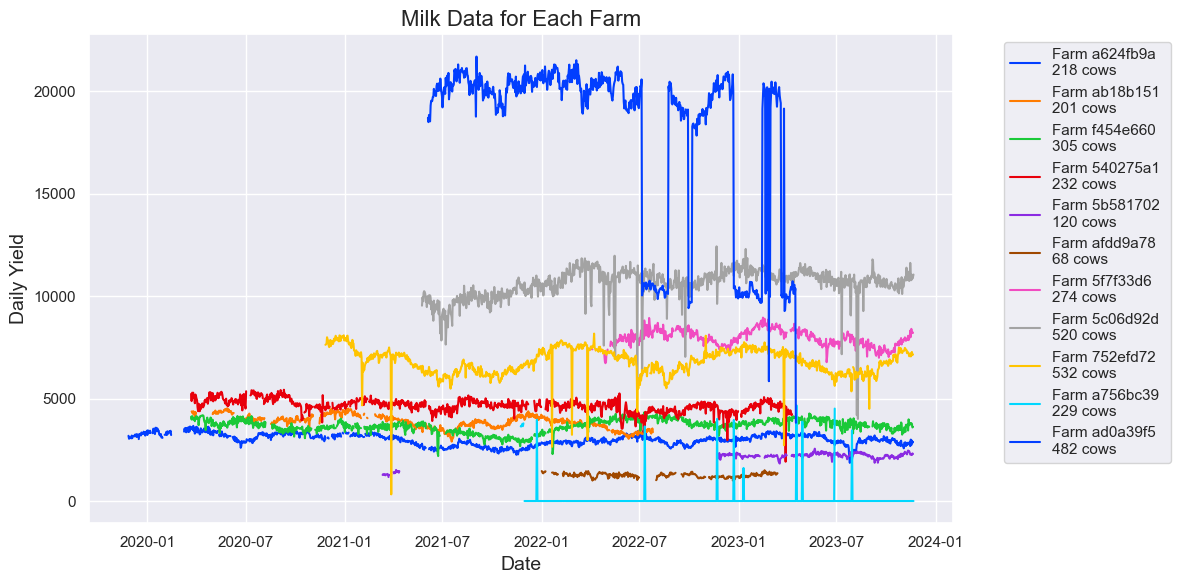

In [8]:
# list of farms
list_of_farms = list(milk_data["FarmName_Pseudo"].unique())
fig, ax = plt.subplots(figsize=(12, 6))

# Dictionary to store farm color mapping
farm_color_mapping = {}

# Loop through each farm and plot
for i, farm in enumerate(list_of_farms):
    
    selected_farm = milk_data[milk_data['FarmName_Pseudo']== farm]
    number_of_cows = len(selected_farm['SE_Number'].unique())
    daily_yield = selected_farm.groupby('StartDate')['TotalYield'].sum()
    color = sns.color_palette('bright', n_colors=len(list_of_farms))[i]
    farm_color_mapping[farm] = color
    all_dates = pd.date_range(start=daily_yield.index.min(), end=daily_yield.index.max(), freq='D')
    missing_dates = all_dates.difference(daily_yield.index)
    daily_yield = daily_yield.reindex(all_dates)
    
    ax.plot(daily_yield.index, daily_yield.values, label=f'Farm {farm} \n{number_of_cows} cows', color=color)


ax.set_title('Milk Data for Each Farm', fontsize=16)
ax.set_xlabel('Date', fontsize=14)
ax.set_ylabel('Daily Yield', fontsize=14)

ax.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.grid(True)
plt.tight_layout()
plt.show()

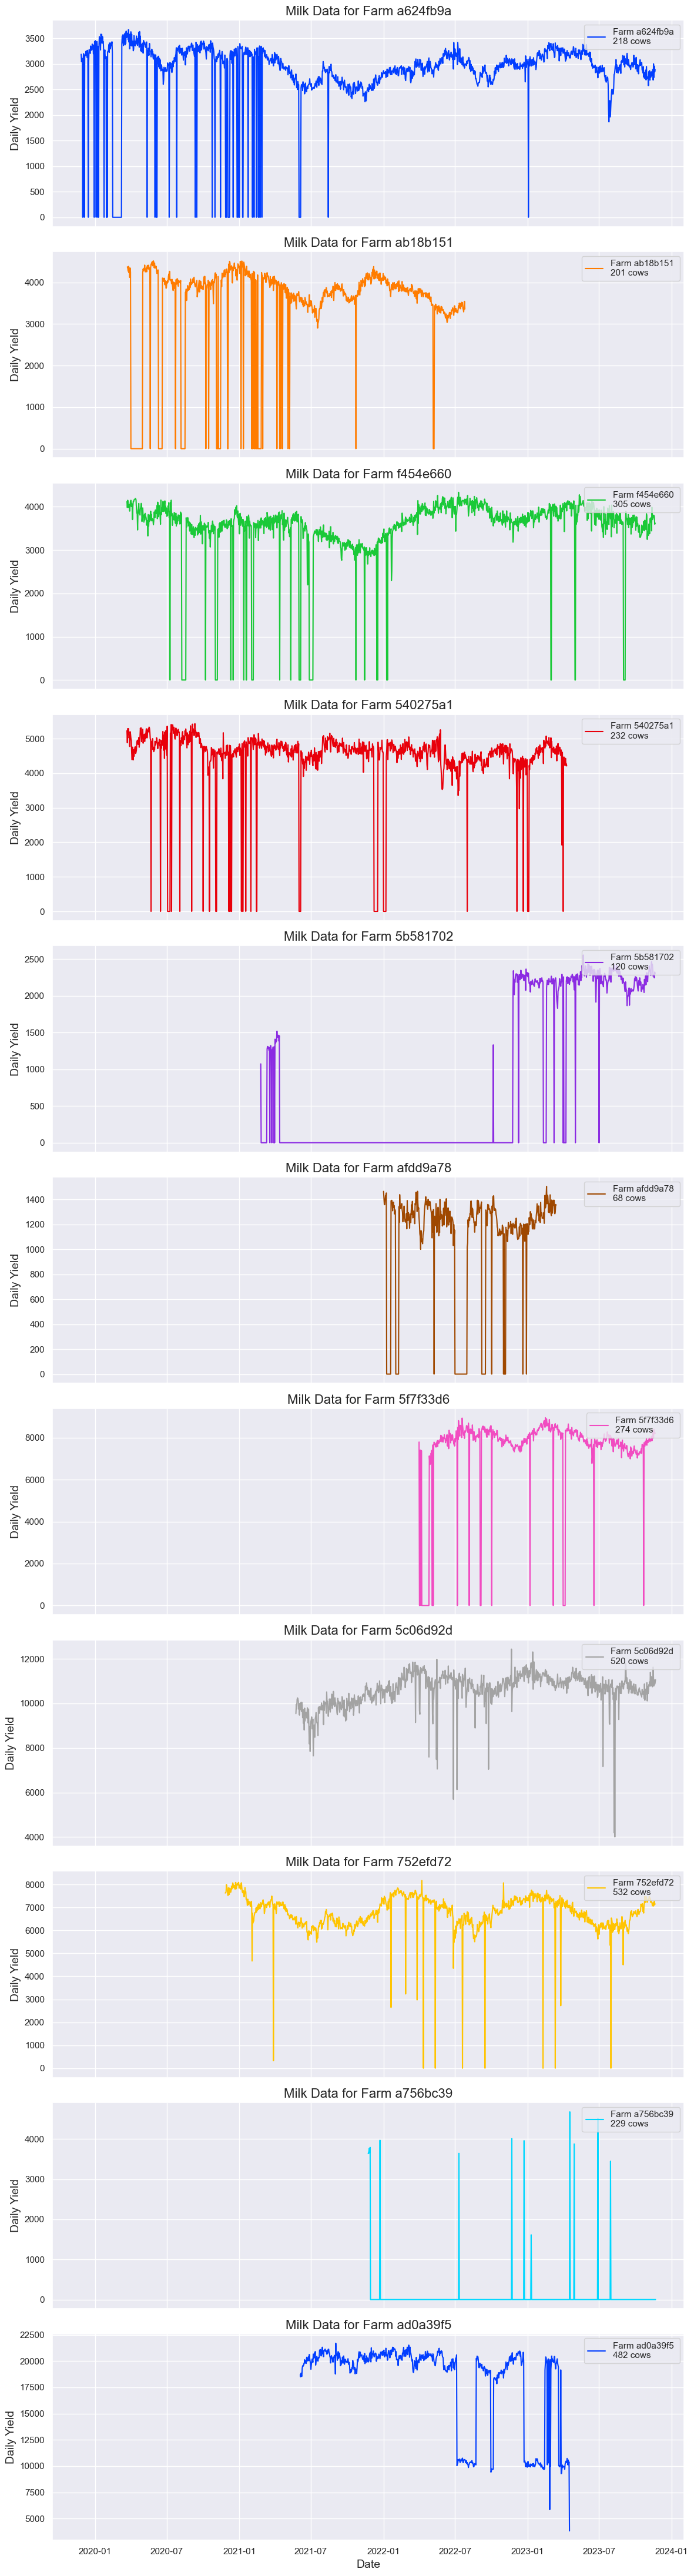

In [9]:
# Create a subplot for each farm
fig, axs = plt.subplots(len(list_of_farms), 1, figsize=(12, len(list_of_farms) * 4), sharex=True)

# Dictionary to store farm color mapping
farm_color_mapping = {}

# Loop through each farm and plot in its subplot
for i, farm in enumerate(list_of_farms):
    ax = axs[i]
    
    selected_farm = milk_data[milk_data['FarmName_Pseudo'] == farm]
    number_of_cows = len(selected_farm['SE_Number'].unique())
    daily_yield = selected_farm.groupby('StartDate')['TotalYield'].sum()
    color = sns.color_palette('bright', n_colors=len(list_of_farms))[i]
    farm_color_mapping[farm] = color
    all_dates = pd.date_range(start=daily_yield.index.min(), end=daily_yield.index.max(), freq='D')
    daily_yield = daily_yield.reindex(all_dates, fill_value=0)
    
    ax.plot(daily_yield.index, daily_yield.values, label=f'Farm {farm} \n{number_of_cows} cows', color=color)
    ax.set_title(f'Milk Data for Farm {farm}', fontsize=16)
    ax.set_ylabel('Daily Yield', fontsize=14)
    ax.legend(loc='upper right')
    ax.grid(True)

axs[-1].set_xlabel('Date', fontsize=14)
plt.tight_layout()
plt.show()

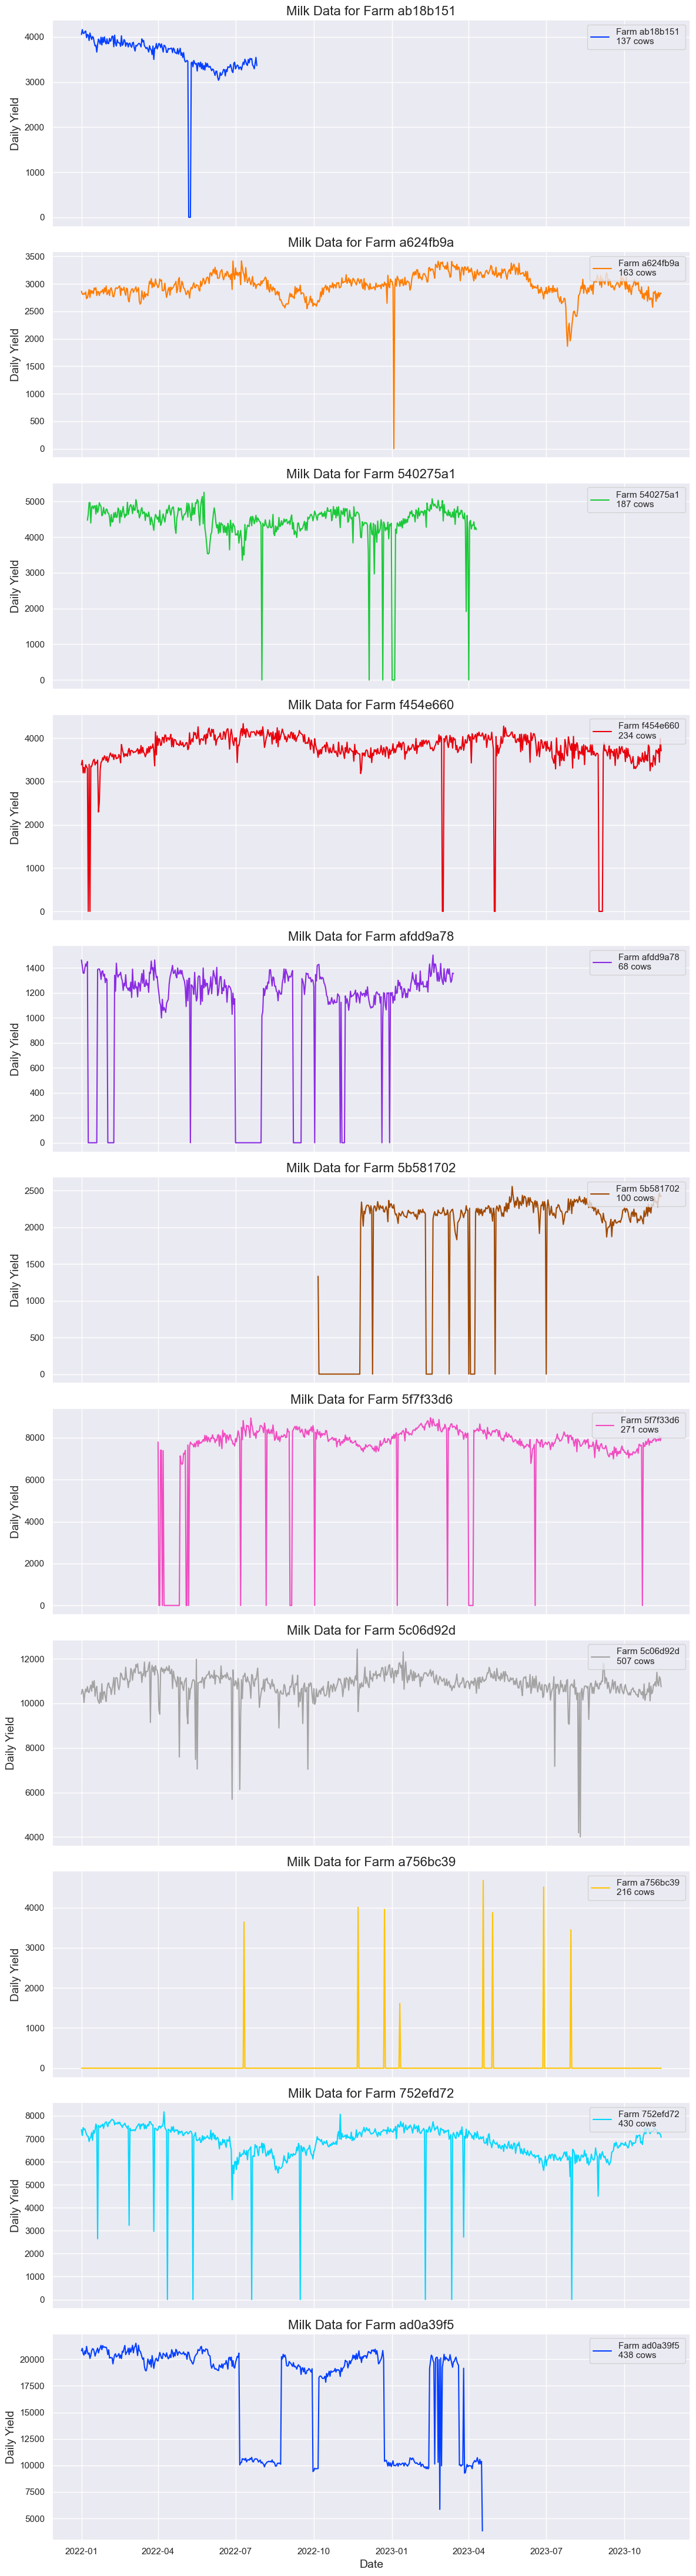

In [10]:

# Filter data for the given time span
start_date = '2022-01-01'
end_date = '2023-11-13'
milk_data['StartDate'] = pd.to_datetime(milk_data['StartDate'])
filtered_data = milk_data[(milk_data['StartDate'] >= start_date) & (milk_data['StartDate'] <= end_date)]

# Get the list of farms
list_of_farms = filtered_data['FarmName_Pseudo'].unique()

# Create a subplot for each farm
fig, axs = plt.subplots(len(list_of_farms), 1, figsize=(12, len(list_of_farms) * 4), sharex=True)

# Dictionary to store farm color mapping
farm_color_mapping = {}

# Loop through each farm and plot in its subplot
for i, farm in enumerate(list_of_farms):
    ax = axs[i]
    
    selected_farm = filtered_data[filtered_data['FarmName_Pseudo'] == farm]
    number_of_cows = len(selected_farm['SE_Number'].unique())
    daily_yield = selected_farm.groupby('StartDate')['TotalYield'].sum()
    color = sns.color_palette('bright', n_colors=len(list_of_farms))[i]
    farm_color_mapping[farm] = color
    all_dates = pd.date_range(start=daily_yield.index.min(), end=daily_yield.index.max(), freq='D')
    daily_yield = daily_yield.reindex(all_dates, fill_value=0)
    
    ax.plot(daily_yield.index, daily_yield.values, label=f'Farm {farm} \n{number_of_cows} cows', color=color)
    ax.set_title(f'Milk Data for Farm {farm}', fontsize=16)
    ax.set_ylabel('Daily Yield', fontsize=14)
    ax.legend(loc='upper right')
    ax.grid(True)

axs[-1].set_xlabel('Date', fontsize=14)
plt.tight_layout()
plt.show()

In [11]:
# Check if there are any Unknown SE_Number values
unknown_se_numbers = milk_data[milk_data['SE_Number'] == 'Unknown']['FarmName_Pseudo'].unique()
print(f'Unknown SE_Number values for farms: {unknown_se_numbers}')

Unknown SE_Number values for farms: ['a624fb9a' 'f454e660' 'ab18b151' '540275a1' 'afdd9a78' '5f7f33d6']
